# Time Series Analysis and Forecasting

In this project the goal is to buid a time series model in order ot predict the temperature of Madrid. The dataset derives from www.ecad.eu and the temperatures are being recorded from 1920 till April 2022. Firstly, I cleaned the temperature, then I built a model to check the trend and the seasonality of the dataset, I plotted and inspected different components of a time series, I modeled time dependence of the remainder using an AR model, I compared the statistical output of different AR models and I tested the remainder for stationarity

In [27]:
!pip install statsmodels

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from statsmodels.tsa.ar_model import AutoReg, ar_select_order

# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

In [28]:
madrid_temp = pd.read_csv('/home/evangelo/decision-dill-student-code/week07/Madrid_Retiro_Dataset/TG_STAID000230.txt', header=14, sep=',', parse_dates=True)

In [29]:
madrid_temp.columns = ['SOUID', 'date', 'temperature', 'quality']

In [30]:
madrid_temp.drop(columns=['SOUID', 'quality'], inplace=True)

In [31]:
madrid_temp['date'] = pd.to_datetime(madrid_temp['date'],format="%Y%m%d")

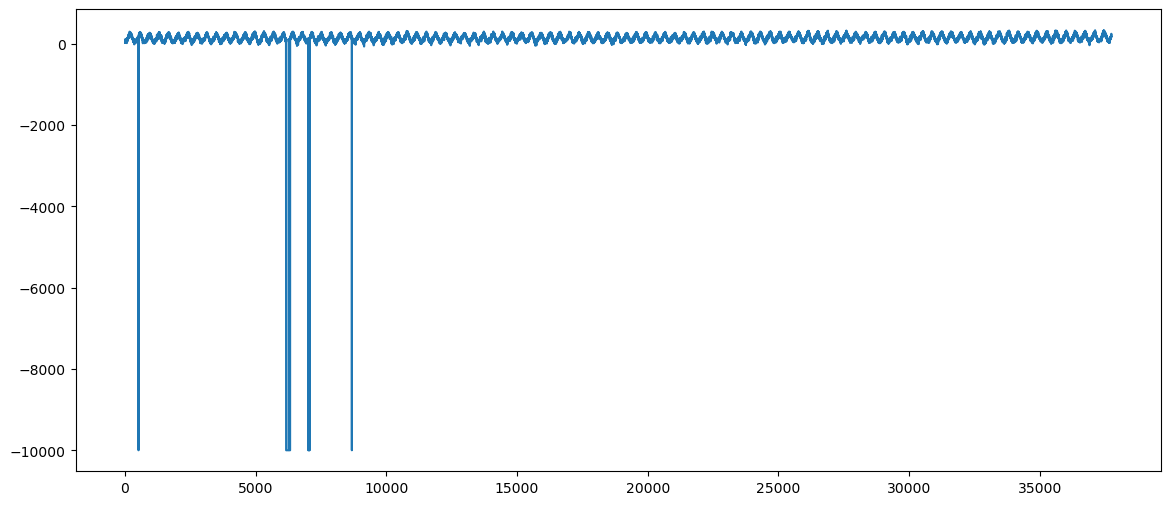

In [32]:
madrid_temp['temperature'].plot();

In [33]:
madrid_temp['temperature'].replace(-9999, np.nan, inplace=True)

In [50]:
madrid_temp

,temperature,timestep,trend
date,,,
1920-01-01,1.04,0,13.347371
1920-01-02,0.68,1,13.347434
1920-01-03,0.55,2,13.347496
1920-01-04,0.46,3,13.347559
1920-01-05,0.41,4,13.347621
...,...,...,...
2023-04-26,2.12,37589,15.697912
2023-04-27,2.32,37590,15.697975
2023-04-28,2.48,37591,15.698037


In [44]:
madrid_temp.set_index('date', inplace=True)

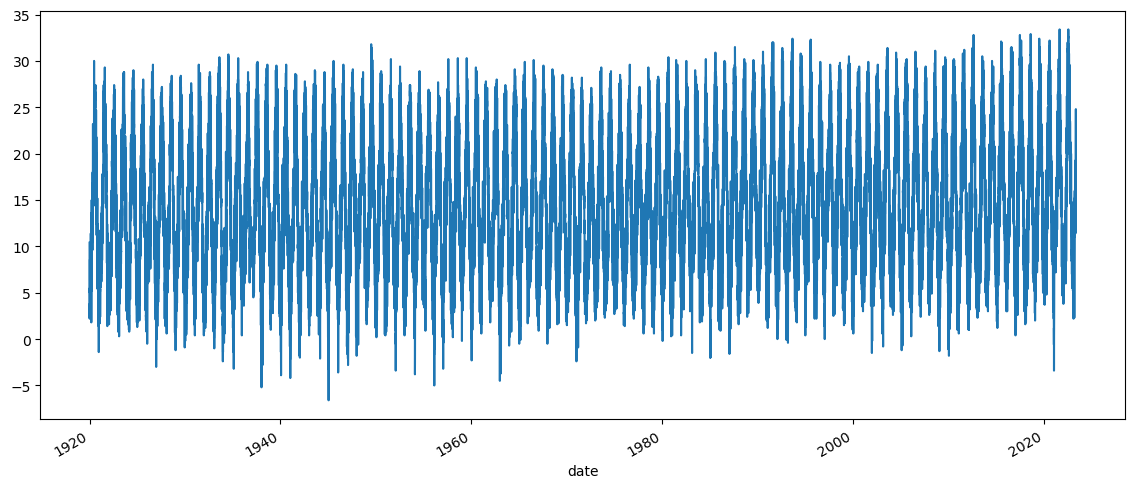

In [45]:
madrid_temp['temperature'].plot();

In [46]:
madrid_temp['temperature'] = madrid_temp['temperature']/10

In [47]:
date_time_range = pd.date_range('1920-01-01', '2023-04-30')

In [49]:
date_time_range.difference(madrid_temp.index)

DatetimeIndex(['1921-05-31', '1936-11-11', '1936-11-12', '1936-11-13',
               '1936-11-14', '1936-11-15', '1936-11-16', '1936-11-17',
               '1936-11-18', '1936-11-19',
               ...
               '1939-04-14', '1939-04-15', '1939-04-16', '1939-04-17',
               '1939-04-18', '1939-04-19', '1939-04-20', '1939-04-21',
               '1939-04-30', '1943-10-05'],
              dtype='datetime64[ns]', length=147, freq=None)

In [51]:
madrid_temp.isnull().sum()

temperature    0
timestep       0
trend          0
dtype: int64

In [52]:
madrid_temp.dropna(inplace=True)

In [53]:
madrid_temp['timestep'] = range(len(madrid_temp))

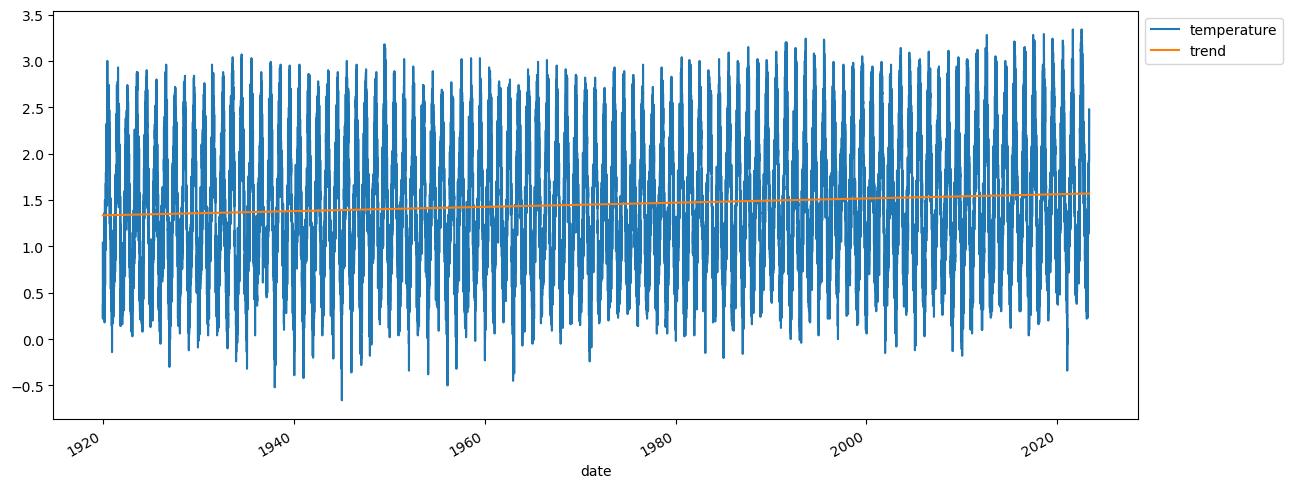

In [54]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
y_initial = madrid_temp['temperature']
X_initial = madrid_temp[['timestep']]
lr.fit(X_initial,y_initial)

madrid_temp['trend'] = lr.predict(X_initial)
madrid_temp[['temperature', 'trend']].plot();
plt.legend(bbox_to_anchor=(1,1));

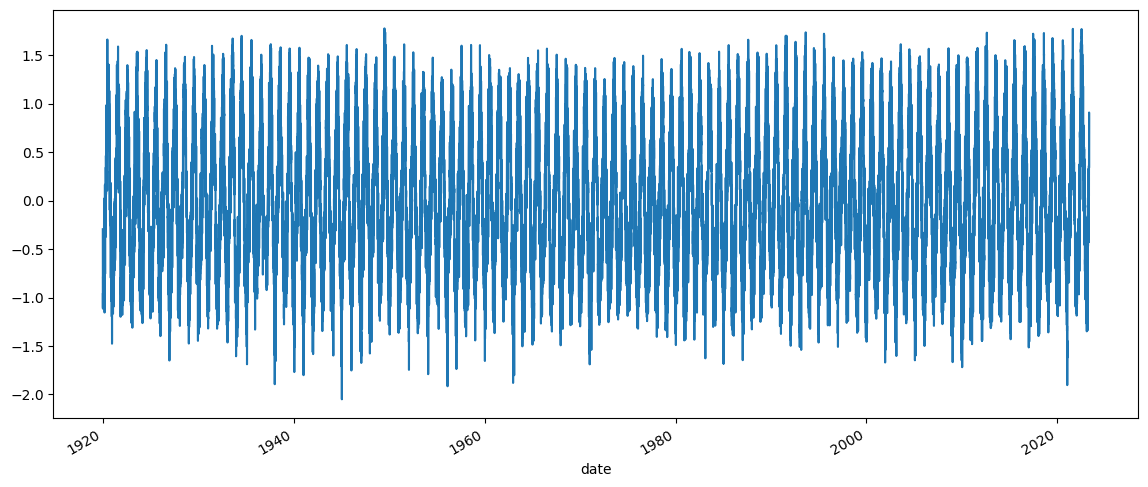

In [55]:
madrid_temp['wo_trend'] = madrid_temp['temperature'] - madrid_temp['trend']
madrid_temp['wo_trend'].plot();

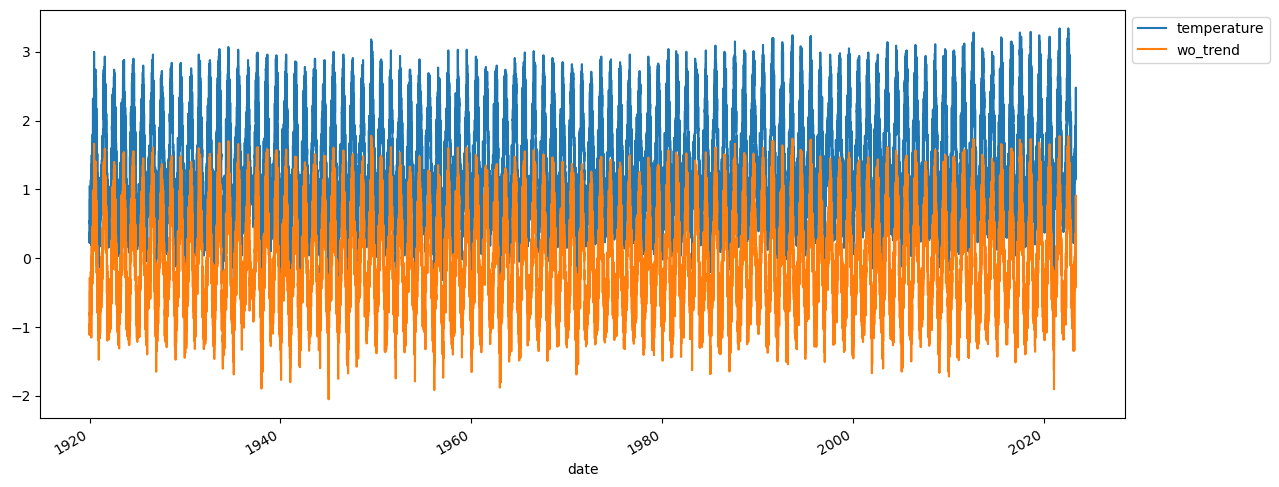

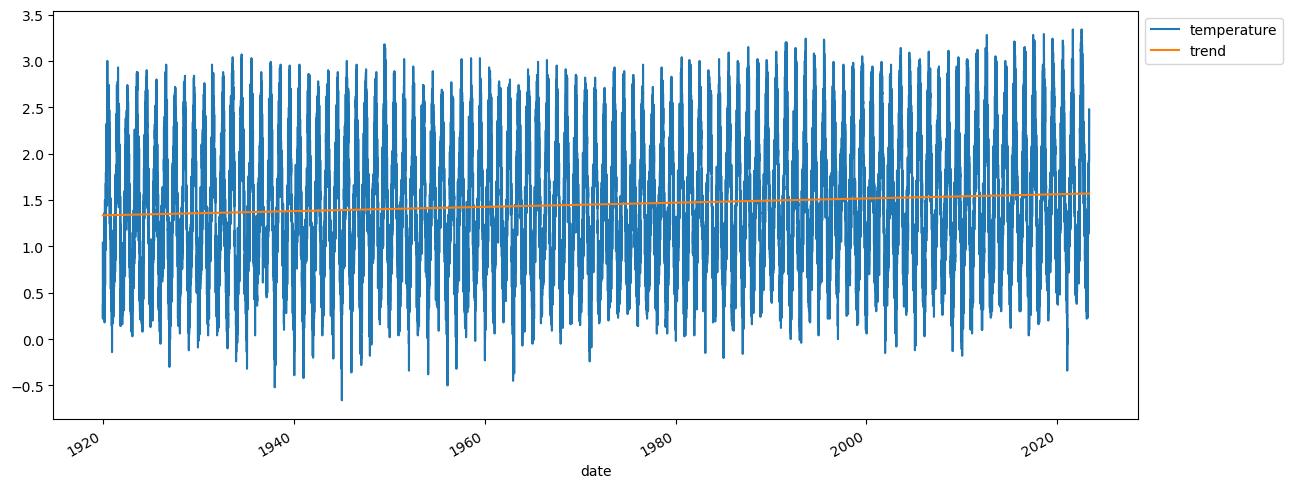

In [56]:
madrid_temp[['temperature','wo_trend']].plot();
plt.legend(bbox_to_anchor=(1,1));
madrid_temp[['temperature', 'trend']].plot();
plt.legend(bbox_to_anchor=(1,1));

In [57]:
def plot_temperature(df, title, ylim=True):
    '''
    Custom plotting function for plotting the flights dataset
    
    Parameters
    ----------
    df : pd.DataFrame
        The data to plot.
    title : str
        The title of the plot
    ylim : bool
        Whether to fix the minimum value of y; defalut is True
    
    Returns
    -------
    Plots the data
    '''
    df.plot()
    plt.title(title)
    plt.ylabel('Temperature')
    #if ylim:
    #    plt.ylim(ymin=0)
    plt.legend(bbox_to_anchor=(1,1));
    plt.show()

In [58]:
len(madrid_temp)

37594

In [61]:
madrid_temp.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='date', length=37594)

In [64]:
madrid_temp

,temperature,timestep,trend,wo_trend,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,
1920-01-01,1.04,0,1.334737,-0.294737,0,0,0,0,0,0,0,0,0,0,0
1920-01-02,0.68,1,1.334743,-0.654743,0,0,0,0,0,0,0,0,0,0,0
1920-01-03,0.55,2,1.334750,-0.784750,0,0,0,0,0,0,0,0,0,0,0
1920-01-04,0.46,3,1.334756,-0.874756,0,0,0,0,0,0,0,0,0,0,0
1920-01-05,0.41,4,1.334762,-0.924762,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26,2.12,37589,1.569791,0.550209,0,0,1,0,0,0,0,0,0,0,0
2023-04-27,2.32,37590,1.569797,0.750203,0,0,1,0,0,0,0,0,0,0,0
2023-04-28,2.48,37591,1.569804,0.910196,0,0,1,0,0,0,0,0,0,0,0


In [63]:
seasonal_dummies = pd.get_dummies(madrid_temp.index.month,
                                  prefix='month',
                                  drop_first=True).set_index(madrid_temp.index)

madrid_temp = madrid_temp.join(seasonal_dummies)

ValueError: columns overlap but no suffix specified: Index(['month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')

In [65]:
madrid_temp.drop(columns=['wo_trend', 'trend'], inplace=True)

In [76]:
madrid_temp.loc['2019-01-01']

temperature        0.66
timestep       36013.00
month_2            0.00
month_3            0.00
month_4            0.00
month_5            0.00
month_6            0.00
month_7            0.00
month_8            0.00
month_9            0.00
month_10           0.00
month_11           0.00
month_12           0.00
Name: 2019-01-01 00:00:00, dtype: float64

In [66]:
madrid_temp_train = madrid_temp[:-7518]
madrid_temp_test = madrid_temp[-7518:]

In [67]:
X_train = madrid_temp_train.drop(columns=['temperature'])
y_train = madrid_temp_train['temperature']

In [68]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [69]:
madrid_temp_train['trend_seasonal'] = lr.predict(X_train)
madrid_temp_train.head()

/tmp/ipykernel_6200/2690193007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_train['trend_seasonal'] = lr.predict(X_train)


,temperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
date,,,,,,,,,,,,,,
1920-01-01,1.04,0,0,0,0,0,0,0,0,0,0,0,0,0.484870
1920-01-02,0.68,1,0,0,0,0,0,0,0,0,0,0,0,0.484875
1920-01-03,0.55,2,0,0,0,0,0,0,0,0,0,0,0,0.484880
1920-01-04,0.46,3,0,0,0,0,0,0,0,0,0,0,0,0.484885
1920-01-05,0.41,4,0,0,0,0,0,0,0,0,0,0,0,0.484890


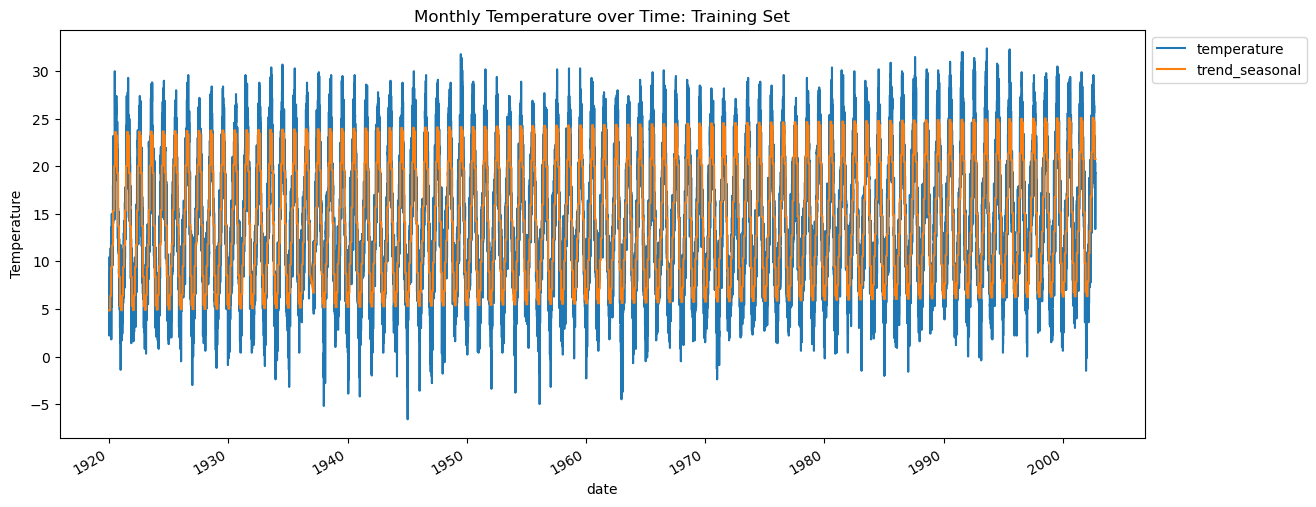

In [28]:
plot_temperature(madrid_temp_train[['temperature', 'trend_seasonal']], title='Monthly Temperature over Time: Training Set');

/tmp/ipykernel_17032/3316976244.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_train['remainder'] = madrid_temp_train['temperature'] - madrid_temp_train['trend_seasonal']


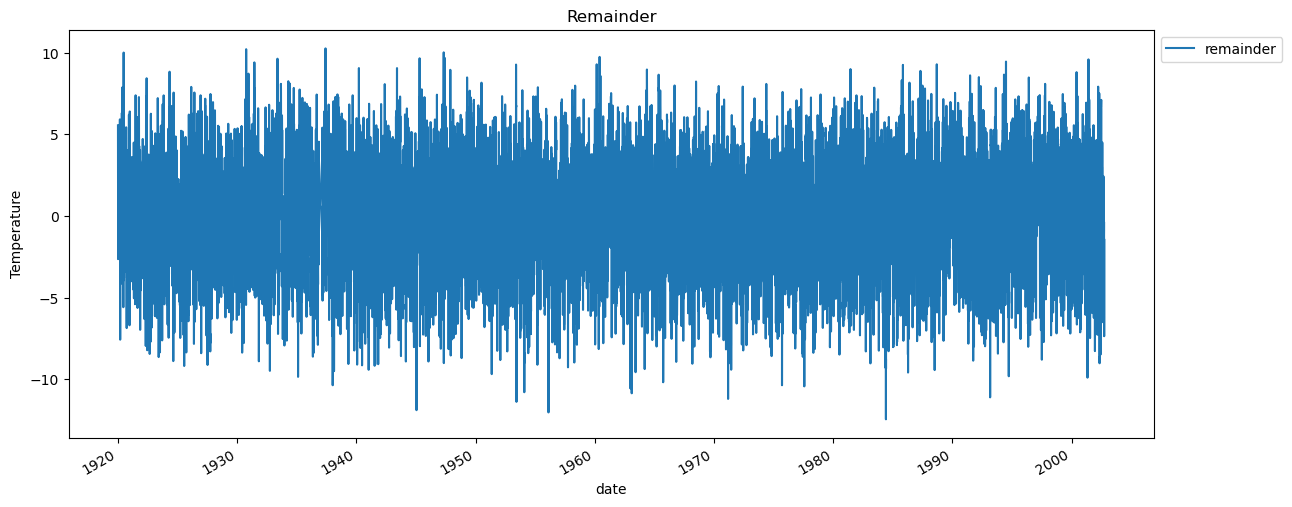

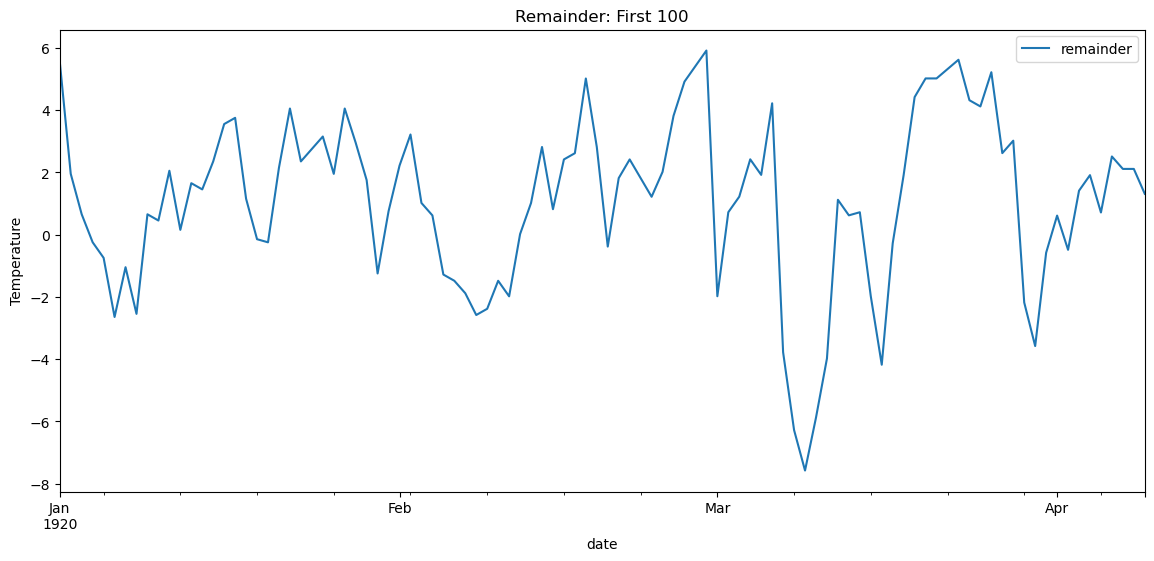

In [29]:
madrid_temp_train['remainder'] = madrid_temp_train['temperature'] - madrid_temp_train['trend_seasonal']
plot_temperature(madrid_temp_train['remainder'], title='Remainder', ylim=False);
plot_temperature(madrid_temp_train['remainder'][:100],title='Remainder: First 100', ylim=False);

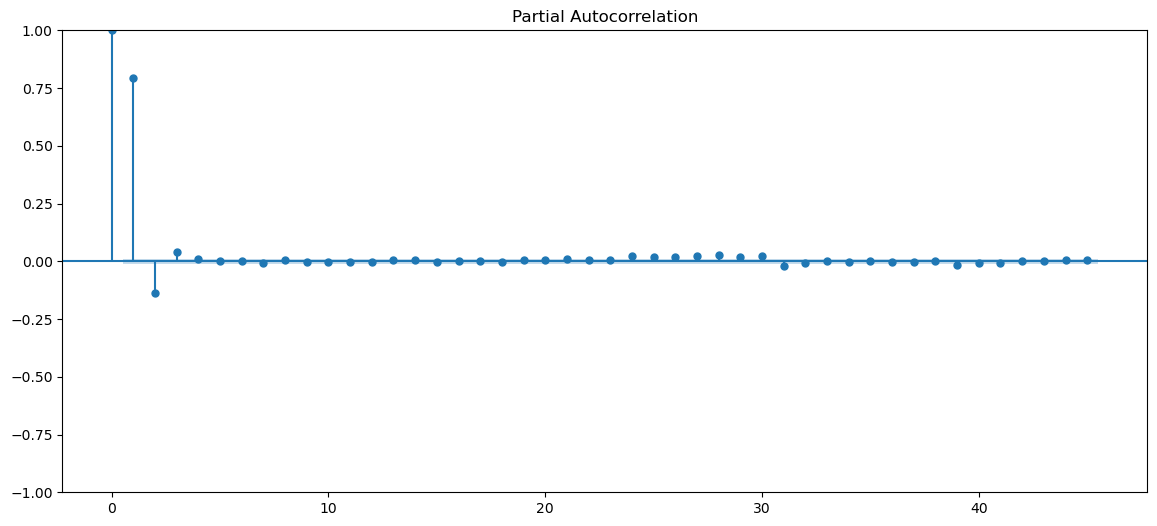

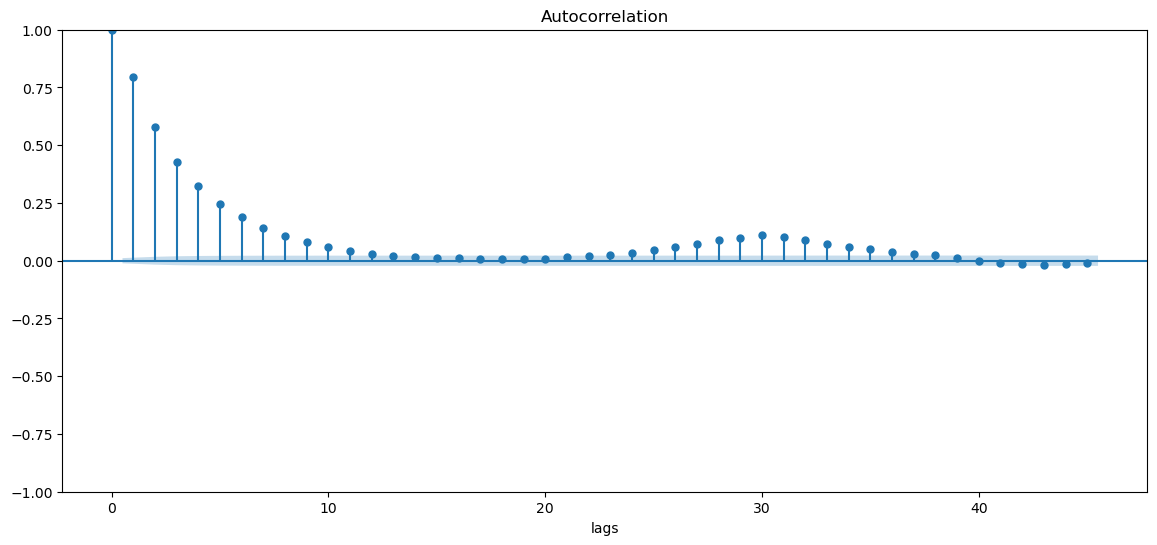

In [30]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
plot_pacf(madrid_temp_train['remainder'])
plot_acf(madrid_temp_train['remainder'])
plt.xlabel('lags');

In [31]:
selected_order = ar_select_order(madrid_temp_train['remainder'], maxlag=12)
selected_order.ar_lags

/home/evangelo/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/evangelo/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


[1, 2, 3]

In [32]:
for i in range(3):
    madrid_temp_train[f'lag{i+1}'] = madrid_temp_train['remainder'].shift(i+1)
madrid_temp_train.dropna(inplace=True)
madrid_temp_train.head()

/tmp/ipykernel_17032/258880341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_train[f'lag{i+1}'] = madrid_temp_train['remainder'].shift(i+1)
/tmp/ipykernel_17032/258880341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_train[f'lag{i+1}'] = madrid_temp_train['remainder'].shift(i+1)
/tmp/ipykernel_17032/258880341.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

,temperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,,
1920-01-04,4.6,3,0,0,0,0,0,0,0,0,0,0,0,4.848847,-0.248847,0.651203,1.951253,5.551303
1920-01-05,4.1,4,0,0,0,0,0,0,0,0,0,0,0,4.848898,-0.748898,-0.248847,0.651203,1.951253
1920-01-06,2.2,5,0,0,0,0,0,0,0,0,0,0,0,4.848948,-2.648948,-0.748898,-0.248847,0.651203
1920-01-07,3.8,6,0,0,0,0,0,0,0,0,0,0,0,4.848998,-1.048998,-2.648948,-0.748898,-0.248847
1920-01-08,2.3,7,0,0,0,0,0,0,0,0,0,0,0,4.849049,-2.549049,-1.048998,-2.648948,-0.748898


In [33]:
X_train_with_lags = madrid_temp_train.drop(columns=['temperature', 'trend_seasonal', 'remainder'])
y_train = madrid_temp_train['temperature']

In [34]:
lr.fit(X_train_with_lags, y_train)

LinearRegression()

In [35]:
madrid_temp_train['predictions_model'] = lr.predict(X_train_with_lags)

/tmp/ipykernel_17032/4028739248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_train['predictions_model'] = lr.predict(X_train_with_lags)


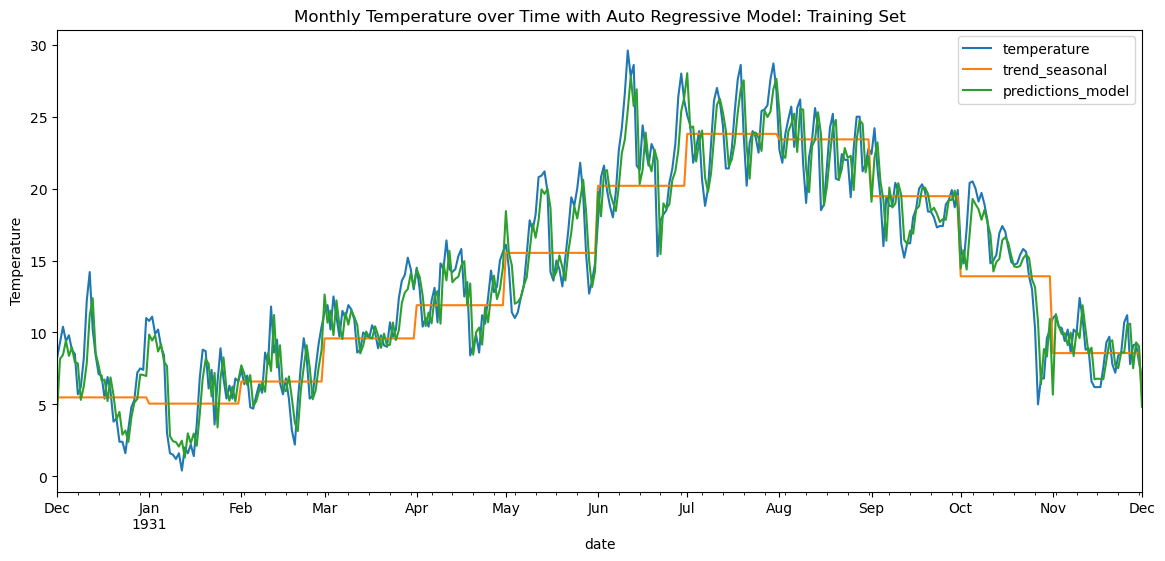

In [36]:
plot_temperature(madrid_temp_train.loc['1930-12-01':'1931-12-01',['temperature', 'trend_seasonal', 'predictions_model']], title='Monthly Temperature over Time with Auto Regressive Model: Training Set')

In [37]:
pd.DataFrame(lr.coef_.reshape(1,15), columns=X_train_with_lags.columns)

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3
0,0.00005,1.50717,4.495617,6.800329,10.461577,15.109353,18.665319,18.269204,14.344873,8.806485,3.478183,0.424861,0.910365,-0.1744,0.039737


In [38]:
ts_split = TimeSeriesSplit(n_splits=5)

In [39]:
for i, (train_index, validation_index) in enumerate(ts_split.split(X_train_with_lags, y_train)):
    print(f"""The training data for the {i+1}th iteration are the observations steps {train_index}""")
    print(f"""The validation data for the {i+1}th iteration are the observations steps {validation_index}""")
    print('\n')
    

The training data for the 1th iteration are the observations steps [   0    1    2 ... 5010 5011 5012]
The validation data for the 1th iteration are the observations steps [ 5013  5014  5015 ... 10022 10023 10024]


The training data for the 2th iteration are the observations steps [    0     1     2 ... 10022 10023 10024]
The validation data for the 2th iteration are the observations steps [10025 10026 10027 ... 15034 15035 15036]


The training data for the 3th iteration are the observations steps [    0     1     2 ... 15034 15035 15036]
The validation data for the 3th iteration are the observations steps [15037 15038 15039 ... 20046 20047 20048]


The training data for the 4th iteration are the observations steps [    0     1     2 ... 20046 20047 20048]
The validation data for the 4th iteration are the observations steps [20049 20050 20051 ... 25058 25059 25060]


The training data for the 5th iteration are the observations steps [    0     1     2 ... 25058 25059 25060]
The valid

In [40]:
time_series_split = ts_split.split(X_train_with_lags, y_train)

In [41]:
result = cross_val_score(estimator=lr, 
                         X=X_train_with_lags, y= y_train,
                         cv=time_series_split)
result, result.mean()

(array([0.93437242, 0.93131067, 0.93446268, 0.92957478, 0.93450181]),
 0.9328444733184942)

In [42]:
madrid_temp_test.head()

,temperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,
2002-09-30,20.2,30076,0,0,0,0,0,0,0,1,0,0,0
2002-10-01,16.0,30077,0,0,0,0,0,0,0,0,1,0,0
2002-10-02,15.0,30078,0,0,0,0,0,0,0,0,1,0,0
2002-10-03,17.4,30079,0,0,0,0,0,0,0,0,1,0,0
2002-10-04,18.5,30080,0,0,0,0,0,0,0,0,1,0,0


In [43]:
X_test = madrid_temp_test.drop(columns=['temperature'])
y_test = madrid_temp_test['temperature']

In [44]:
lr.fit(X_test, y_test)

LinearRegression()

In [45]:
madrid_temp_test['trend_seasonal'] = lr.predict(X_test)

/tmp/ipykernel_17032/1455443985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_test['trend_seasonal'] = lr.predict(X_test)


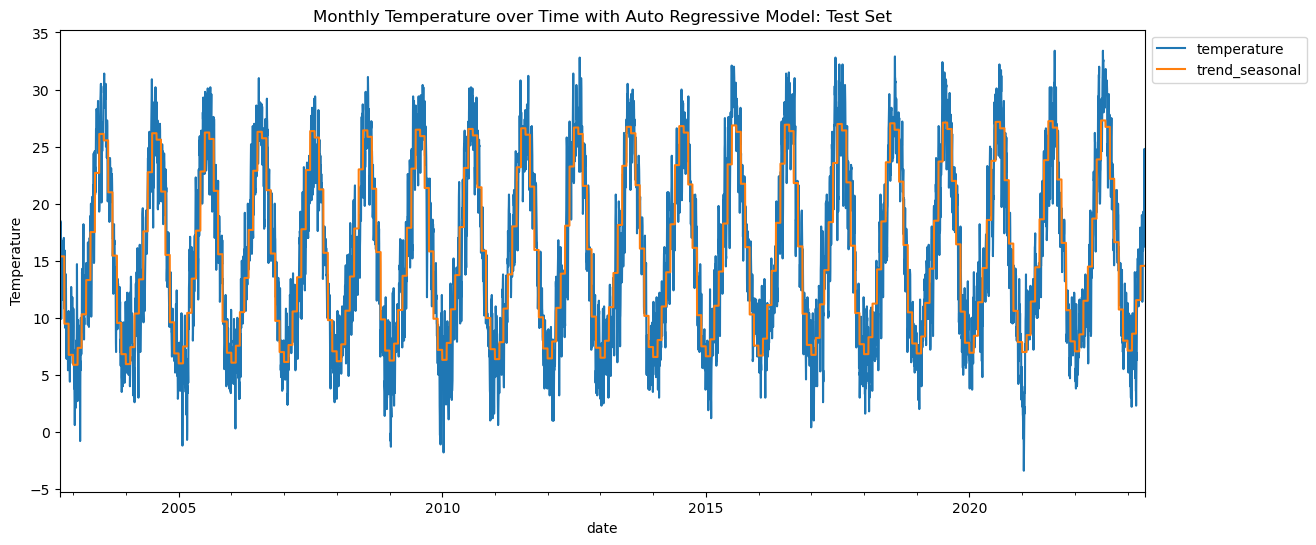

In [46]:
plot_temperature(madrid_temp_test[['temperature', 'trend_seasonal']], title='Monthly Temperature over Time with Auto Regressive Model: Test Set', ylim=False);

In [47]:
madrid_temp_test['remainder'] = madrid_temp_test['temperature'] - madrid_temp_test['trend_seasonal']

/tmp/ipykernel_17032/427961856.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_test['remainder'] = madrid_temp_test['temperature'] - madrid_temp_test['trend_seasonal']


In [48]:
for i in range(3):
    madrid_temp_test[f'lag{i+1}'] = madrid_temp_test['remainder'].shift(i+1)

/tmp/ipykernel_17032/2497090794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_test[f'lag{i+1}'] = madrid_temp_test['remainder'].shift(i+1)
/tmp/ipykernel_17032/2497090794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_test[f'lag{i+1}'] = madrid_temp_test['remainder'].shift(i+1)
/tmp/ipykernel_17032/2497090794.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [49]:
madrid_temp_test.head()

,temperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,,
2002-09-30,20.2,30076,0,0,0,0,0,0,0,1,0,0,0,20.936737,-0.736737,NaN,NaN,NaN
2002-10-01,16.0,30077,0,0,0,0,0,0,0,0,1,0,0,15.378763,0.621237,-0.736737,NaN,NaN
2002-10-02,15.0,30078,0,0,0,0,0,0,0,0,1,0,0,15.378934,-0.378934,0.621237,-0.736737,NaN
2002-10-03,17.4,30079,0,0,0,0,0,0,0,0,1,0,0,15.379104,2.020896,-0.378934,0.621237,-0.736737
2002-10-04,18.5,30080,0,0,0,0,0,0,0,0,1,0,0,15.379274,3.120726,2.020896,-0.378934,0.621237


In [50]:
X_test_with_lags = madrid_temp_test.drop(columns=['temperature', 'trend_seasonal', 'remainder'])
X_test_with_lags.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3
date,,,,,,,,,,,,,,,
2002-09-30,30076,0,0,0,0,0,0,0,1,0,0,0,NaN,NaN,NaN
2002-10-01,30077,0,0,0,0,0,0,0,0,1,0,0,-0.736737,NaN,NaN
2002-10-02,30078,0,0,0,0,0,0,0,0,1,0,0,0.621237,-0.736737,NaN
2002-10-03,30079,0,0,0,0,0,0,0,0,1,0,0,-0.378934,0.621237,-0.736737
2002-10-04,30080,0,0,0,0,0,0,0,0,1,0,0,2.020896,-0.378934,0.621237


In [51]:
X_test_with_lags.loc['2002-10-02', 'lag3'] = madrid_temp_train.loc['2002-09-29', 'remainder']
X_test_with_lags.loc['2002-10-01', 'lag3'] = madrid_temp_train.loc['2002-09-28', 'remainder']
X_test_with_lags.loc['2002-09-30', 'lag3'] = madrid_temp_train.loc['2002-09-27', 'remainder']
X_test_with_lags.loc['2002-10-01', 'lag2'] = madrid_temp_train.loc['2002-09-29', 'remainder']
X_test_with_lags.loc['2002-09-30', 'lag2'] = madrid_temp_train.loc['2002-09-28', 'remainder']
X_test_with_lags.loc['2002-09-30', 'lag1'] = madrid_temp_train.loc['2002-09-29', 'remainder']

In [52]:
lr.fit(X_test_with_lags, y_test)

LinearRegression()

In [53]:
lr.score(X_test_with_lags, y_test)

0.9409067380216667

In [54]:
madrid_temp_test['predictions_model'] = lr.predict(X_test_with_lags)

/tmp/ipykernel_17032/3087570675.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_temp_test['predictions_model'] = lr.predict(X_test_with_lags)


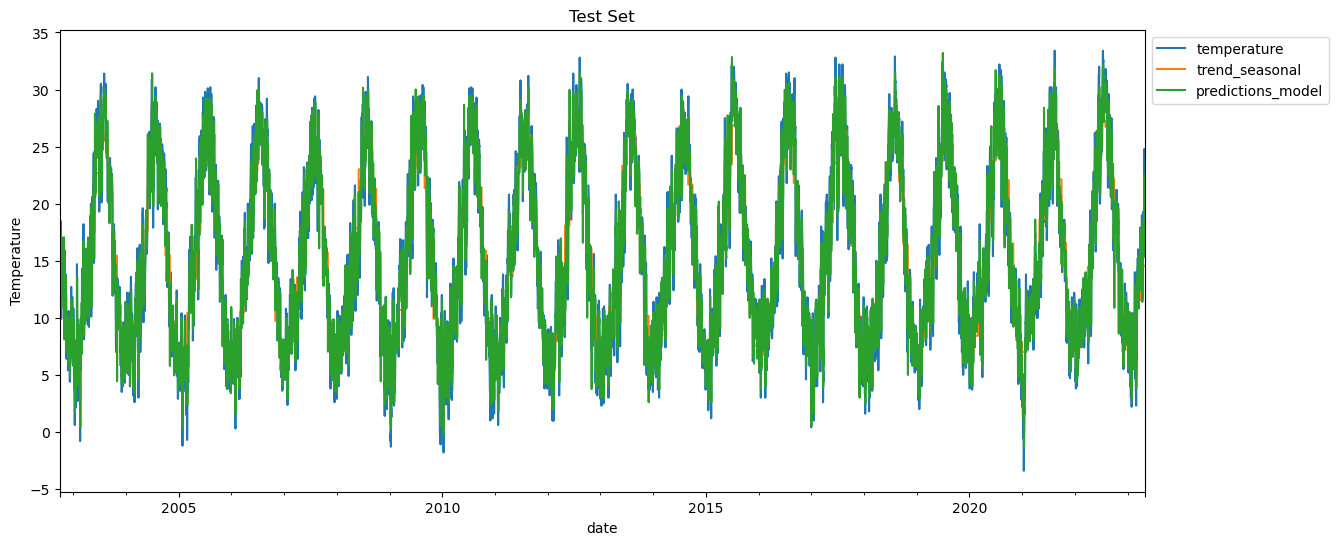

In [55]:
plot_temperature(madrid_temp_test[['temperature', 'trend_seasonal', 'predictions_model']], title='Test Set', ylim=False);

In [56]:
madrid_temp_full = pd.concat([madrid_temp_train[['temperature', 'trend_seasonal', 'predictions_model']], madrid_temp_test[['temperature', 'trend_seasonal', 'predictions_model']]])
madrid_temp_full.head()

,temperature,trend_seasonal,predictions_model
date,,,
1920-01-04,4.6,4.848847,5.358328
1920-01-05,4.1,4.848898,4.622678
1920-01-06,2.2,4.848948,4.272809
1920-01-07,3.8,4.848998,2.594564
1920-01-08,2.3,4.849049,4.362649


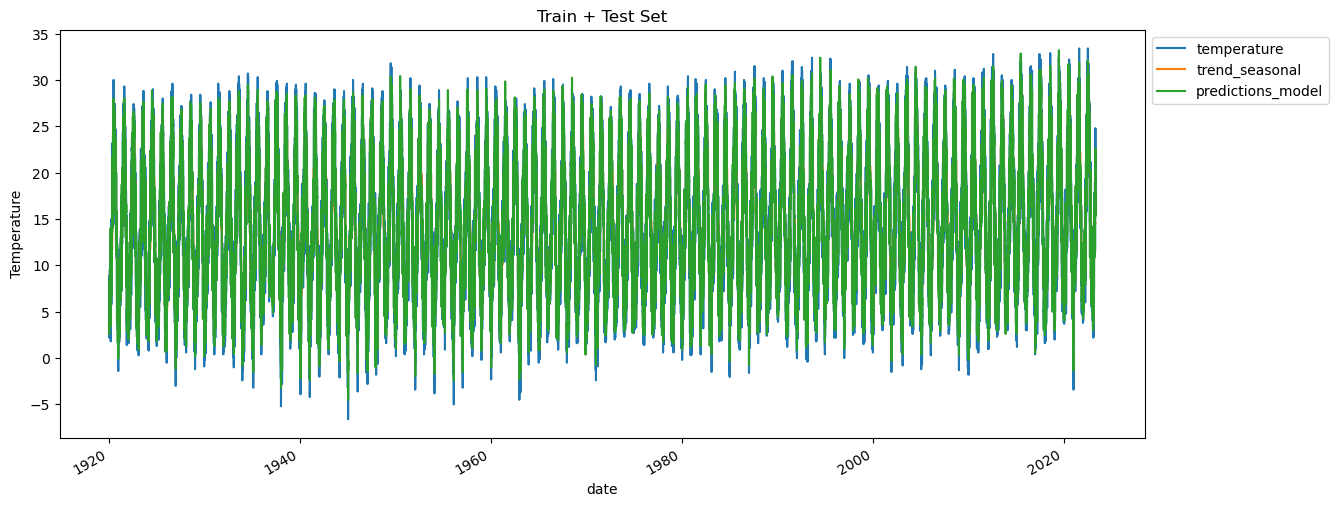

In [57]:
plot_temperature(madrid_temp_full, title='Train + Test Set');

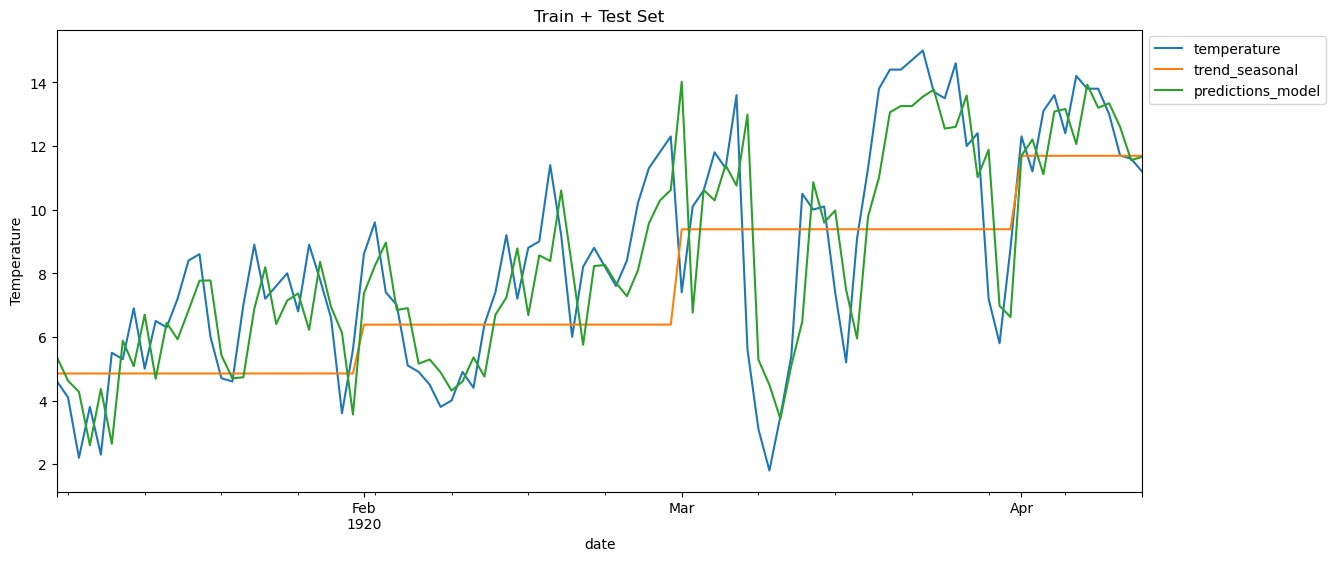

In [58]:
plot_temperature(madrid_temp_full[:100], title='Train + Test Set');

In [59]:
print(f"""
{lr.score(X_train_with_lags, y_train)}
{lr.score(X_test_with_lags, y_test)}
""")


0.8550336940007724
0.9409067380216667



In [60]:
madrid_temp_combined = pd.concat([madrid_temp_train, madrid_temp_test])
madrid_temp_combined

,temperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3,predictions_model
date,,,,,,,,,,,,,,,,,,,
1920-01-04,4.6,3,0,0,0,0,0,0,0,0,0,0,0,4.848847,-0.248847,0.651203,1.951253,5.551303,5.358328
1920-01-05,4.1,4,0,0,0,0,0,0,0,0,0,0,0,4.848898,-0.748898,-0.248847,0.651203,1.951253,4.622678
1920-01-06,2.2,5,0,0,0,0,0,0,0,0,0,0,0,4.848948,-2.648948,-0.748898,-0.248847,0.651203,4.272809
1920-01-07,3.8,6,0,0,0,0,0,0,0,0,0,0,0,4.848998,-1.048998,-2.648948,-0.748898,-0.248847,2.594564
1920-01-08,2.3,7,0,0,0,0,0,0,0,0,0,0,0,4.849049,-2.549049,-1.048998,-2.648948,-0.748898,4.362649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26,21.2,37589,0,0,1,0,0,0,0,0,0,0,0,14.550917,6.649083,6.049253,3.849424,1.649594,19.473533
2023-04-27,23.2,37590,0,0,1,0,0,0,0,0,0,0,0,14.551087,8.648913,6.649083,6.049253,3.849424,19.666616
2023-04-28,24.8,37591,0,0,1,0,0,0,0,0,0,0,0,14.551257,10.248743,8.648913,6.649083,6.049253,21.458221


In [61]:
X_combined = madrid_temp_combined.drop(columns=['temperature', 'trend_seasonal', 'remainder', 'predictions_model'])
y_combined = madrid_temp_combined['temperature']

In [62]:
X_combined.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3
date,,,,,,,,,,,,,,,
1920-01-04,3,0,0,0,0,0,0,0,0,0,0,0,0.651203,1.951253,5.551303
1920-01-05,4,0,0,0,0,0,0,0,0,0,0,0,-0.248847,0.651203,1.951253
1920-01-06,5,0,0,0,0,0,0,0,0,0,0,0,-0.748898,-0.248847,0.651203
1920-01-07,6,0,0,0,0,0,0,0,0,0,0,0,-2.648948,-0.748898,-0.248847
1920-01-08,7,0,0,0,0,0,0,0,0,0,0,0,-1.048998,-2.648948,-0.748898


In [63]:
X_combined.tail()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3
date,,,,,,,,,,,,,,,
2023-04-26,37589,0,0,1,0,0,0,0,0,0,0,0,6.049253,3.849424,1.649594
2023-04-27,37590,0,0,1,0,0,0,0,0,0,0,0,6.649083,6.049253,3.849424
2023-04-28,37591,0,0,1,0,0,0,0,0,0,0,0,8.648913,6.649083,6.049253
2023-04-29,37592,0,0,1,0,0,0,0,0,0,0,0,10.248743,8.648913,6.649083
2023-04-30,37593,0,0,1,0,0,0,0,0,0,0,0,6.348572,10.248743,8.648913


In [64]:
y_combined.tail()

date
2023-04-26    21.2
2023-04-27    23.2
2023-04-28    24.8
2023-04-29    20.9
2023-04-30    19.2
Name: temperature, dtype: float64

In [65]:
X_combined.loc['2002-10-02', 'lag3'] = madrid_temp_train.loc['2002-09-29', 'remainder']
X_combined.loc['2002-10-01', 'lag3'] = madrid_temp_train.loc['2002-09-28', 'remainder']
X_combined.loc['2002-09-30', 'lag3'] = madrid_temp_train.loc['2002-09-27', 'remainder']
X_combined.loc['2002-10-01', 'lag2'] = madrid_temp_train.loc['2002-09-29', 'remainder']
X_combined.loc['2002-09-30', 'lag2'] = madrid_temp_train.loc['2002-09-28', 'remainder']
X_combined.loc['2002-09-30', 'lag1'] = madrid_temp_train.loc['2002-09-29', 'remainder']

In [66]:
lr.fit(X_combined, y_combined)

LinearRegression()

In [67]:
timestep = madrid_temp_combined['timestep'].max() + 1
months = [0] * 11
lag_1 = madrid_temp_combined.loc['2023-04-30', 'remainder']
lag_2 = madrid_temp_combined.loc['2023-04-29', 'remainder']
lag_3 = madrid_temp_combined.loc['2023-04-28', 'remainder']

In [68]:
X_future = [timestep]
X_future

[37594]

In [69]:
X_future.extend(months)
X_future

[37594, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [70]:
X_future.append(lag_1)
X_future.append(lag_2)
X_future.append(lag_3)

X_future

[37594,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4.648402066410515,
 6.348572330156021,
 10.248742593901529]

In [71]:
X_combined.columns

Index(['timestep', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
       'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'lag1', 'lag2', 'lag3'],
      dtype='object')

In [72]:
X_future = pd.DataFrame([X_future])
X_future.columns = X_combined.columns
X_future

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3
0,37594,0,0,0,0,0,0,0,0,0,0,0,4.648402,6.348572,10.248743


In [73]:
X_future.shape

(1, 15)

In [74]:
timestep = madrid_temp_combined['timestep'].max() + 2
months = [1] + [0]*10
lag_i = 0 
lag_2i = madrid_temp_combined.loc['2023-04-30', 'remainder']
lag_3i = madrid_temp_combined.loc['2023-04-29', 'remainder']

In [75]:
X_future_2 = pd.DataFrame([[timestep] + months + [lag_i] + [lag_2i] + [lag_3i]])
X_future_2.columns = X_combined.columns
X_future_2

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3
0,37595,1,0,0,0,0,0,0,0,0,0,0,0,4.648402,6.348572


In [76]:
timestep = madrid_temp_combined['timestep'].max() + 3
months = [1] + [0]*10
lag_j = 0 
lag_2j = 0
lag_3j = madrid_temp_combined.loc['2023-04-30', 'remainder']

In [77]:
X_future_3 = pd.DataFrame([[timestep] + months + [lag_j] + [lag_2j] + [lag_3j]])
X_future_3.columns = X_combined.columns
X_future_3

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3
0,37596,1,0,0,0,0,0,0,0,0,0,0,0,0,4.648402


In [78]:
timestep = madrid_temp_combined['timestep'].max() + 4
months = [1] + [0]*10
lag_k = 0 
lag_2k = 0
lag_3k = 0

In [79]:
X_future_4 = pd.DataFrame([[timestep] + months + [lag_k] + [lag_2k] + [lag_3k]])
X_future_4.columns = X_combined.columns
X_future_4

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,lag1,lag2,lag3
0,37597,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
madrid_temp_combined.columns, madrid_temp_full.columns

(Index(['temperature', 'timestep', 'month_2', 'month_3', 'month_4', 'month_5',
        'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11',
        'month_12', 'trend_seasonal', 'remainder', 'lag1', 'lag2', 'lag3',
        'predictions_model'],
       dtype='object'),
 Index(['temperature', 'trend_seasonal', 'predictions_model'], dtype='object'))

In [81]:
lr.fit(X_combined, y_combined)

LinearRegression()

In [82]:
lr.predict(X_future), lr.predict(X_future_2), lr.predict(X_future_3), lr.predict(X_future_4)

(array([10.56181575]),
 array([7.96901747]),
 array([8.73005031]),
 array([8.56429959]))

In [83]:
y_combined.tail()

date
2023-04-26    21.2
2023-04-27    23.2
2023-04-28    24.8
2023-04-29    20.9
2023-04-30    19.2
Name: temperature, dtype: float64

In [84]:
ar_model = AutoReg(endog=madrid_temp_combined['remainder'], lags=3).fit()

/home/evangelo/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [85]:
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                37591
Model:                     AutoReg(3)   Log Likelihood              -76973.241
Method:               Conditional MLE   S.D. of innovations              1.876
Date:                Wed, 09 Aug 2023   AIC                         153956.483
Time:                        22:37:09   BIC                         153999.155
Sample:                             3   HQIC                        153970.029
                                37591                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0001      0.010      0.011      0.991      -0.019       0.019
remainder.L1     0.9144      0.005    177.388      0.000       0.904       0.924
remainder.L2    -0.1768      0.007    -25.518      0.000      -0.190      -0.163
remainder.L3     0.0354      0.005      6.870      0.000       0.025       0.046
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.3510           -0.0000j            1.3510           -0.0000
AR.2            1.8199           -4.1937j            4.5716           -0.1848
AR.3            1.8199           +4.1937j            4.5716            0.1848
-----------------------------------------------------------------------------
"""

In [112]:
import numpy as np
import pandas as pd

# data visualization stack
import matplotlib as mpl
import seaborn as sns
sns.set_style('whitegrid')

# statistics stack
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
!pip install pmdarima
import pmdarima as pm

# miscellaneous
import warnings
warnings.filterwarnings("ignore")

In [113]:
def white_noise(number_of_terms):
    np.random.seed(0)
    noise_terms = np.random.randn(number_of_terms)
    return noise_terms

In [114]:
def white_homoscedasticity_test(series):
    """
    returns p-value for White's homoscedasticity test
    """
    series = series.reset_index(drop=True).reset_index()
    series.columns = ['time', 'value']
    series['time'] += 1
    
    olsr = ols('value ~ time', series).fit()
    p_value = het_white(olsr.resid, olsr.model.exog)[1]
    
    return round(p_value,6)

In [115]:
def p_values(series):
    """
    returns p-values for ADF and KPSS Tests on a time series
    """
    # p value from Augmented Dickey-Fuller (ADF) Test
    p_adf = adfuller(series, autolag="AIC")[1]
    
    # p value from Kwiatkowski–Phillips–Schmidt–Shin (KPSS) Test
    p_kpss = kpss(series, regression="c", nlags="auto")[1]
    
    return round(p_adf,6), round(p_kpss,6)

In [116]:
def test_stationarity_2(series):
    """
    returns likely conclusions about series stationarity
    """
    # test homoscedasticity
    p_white = white_homoscedasticity_test(series)
    
    #if p_white < 0.05:
    #    print(f"\n non-stationary: heteroscedastic (qcd = {qcd}) \n")
    
    # test stationarity
    #else:
    p_adf, p_kpss = p_values(series)
        
    # print p-values
    print( f"\n p_adf: {p_adf}, p_kpss: {p_kpss}" )
    
    if (p_adf < 0.05) and (p_kpss >= 0.05):
        print('\n stationary or seasonal-stationary')
            
    elif (p_adf >= 0.1) and (p_kpss < 0.05):
        print('\n difference-stationary')
            
    elif (p_adf < 0.1) and (p_kpss < 0.05):
        print('\n trend-stationary')
        
    else:
        print('\n non-stationary; no robust conclusions\n')

In [117]:
def auto_correlation_plot(series):
    """
    plots autocorrelations for a given series
    """
    mpl.rc('figure',figsize=(10,2),dpi=200)
    plot_acf(series,zero=False,lags=25)
    plt.xlabel('number of lags')
    plt.ylabel('autocorrelation')

In [118]:
def partial_auto_correlation_plot(series):
    """
    plots partial autocorrelations for a given series
    """
    mpl.rc('figure',figsize=(10,2),dpi=200)
    plot_pacf(series,zero=False,lags=25)
    plt.xlabel('number of lags')
    plt.ylabel('partial autocorrelation')

In [119]:
def arma_model(ar_coef=[], ma_coef=[]):
    """
    generates sample data for AR, MA, and ARMA processes
    """
    np.random.seed(12345)
    ar = np.array([1] + [-c for c in ar_coef])
    ma = np.array([1] + ma_coef)
    data = ArmaProcess(ar,ma).generate_sample(nsample=200)
    return data

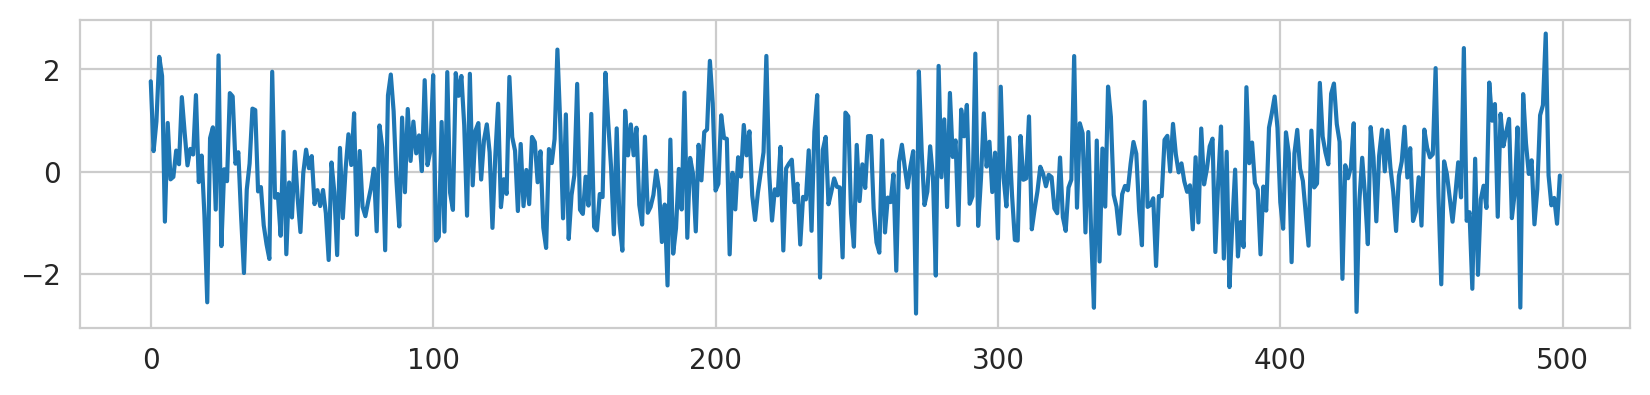

In [120]:
plt.plot(white_noise(len(madrid_temp['temperature'][:500])));

In [121]:
madrid_temp_full.columns

Index(['temperature', 'trend_seasonal', 'predictions_model'], dtype='object')

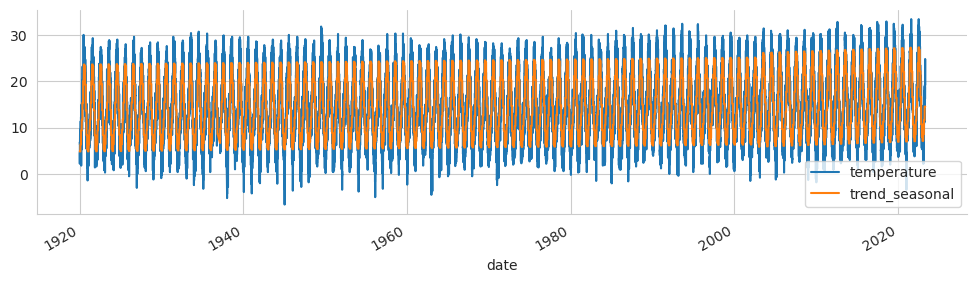

In [122]:
mpl.rc('figure',figsize=(12,3),dpi=100)

madrid_temp_full[['temperature', 'trend_seasonal']].plot()
sns.despine()

In [123]:
madrid_temp_full.columns

Index(['temperature', 'trend_seasonal', 'predictions_model'], dtype='object')

In [124]:
def test_stationarity(series):
    result=adfuller(series)
    print('Test Statistic: %f' %result[0])
    print('p-value: %f' %result[1])
    print('Critical values:')
    for key, value in result[4].items ():
         print('\t%s: %.3f' %(key, value))

In [125]:
white_homoscedasticity_test(y_combined)

0.0

In [126]:
madrid_temp_squared = np.sqrt(madrid_temp['temperature'])
madrid_temp_squared_diff = madrid_temp_squared.diff().dropna()

In [127]:
madrid_temp_combined

,temperature,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3,predictions_model
date,,,,,,,,,,,,,,,,,,,
1920-01-04,4.6,3,0,0,0,0,0,0,0,0,0,0,0,4.848847,-0.248847,0.651203,1.951253,5.551303,5.358328
1920-01-05,4.1,4,0,0,0,0,0,0,0,0,0,0,0,4.848898,-0.748898,-0.248847,0.651203,1.951253,4.622678
1920-01-06,2.2,5,0,0,0,0,0,0,0,0,0,0,0,4.848948,-2.648948,-0.748898,-0.248847,0.651203,4.272809
1920-01-07,3.8,6,0,0,0,0,0,0,0,0,0,0,0,4.848998,-1.048998,-2.648948,-0.748898,-0.248847,2.594564
1920-01-08,2.3,7,0,0,0,0,0,0,0,0,0,0,0,4.849049,-2.549049,-1.048998,-2.648948,-0.748898,4.362649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-26,21.2,37589,0,0,1,0,0,0,0,0,0,0,0,14.550917,6.649083,6.049253,3.849424,1.649594,19.473533
2023-04-27,23.2,37590,0,0,1,0,0,0,0,0,0,0,0,14.551087,8.648913,6.649083,6.049253,3.849424,19.666616
2023-04-28,24.8,37591,0,0,1,0,0,0,0,0,0,0,0,14.551257,10.248743,8.648913,6.649083,6.049253,21.458221


In [128]:
test_stationarity(madrid_temp_combined['predictions_model'])

Test Statistic: -21.669992
p-value: 0.000000
Critical values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


result_kpss_ct_log=kpss(madrid_temp_squared_diff,regression="ct")
print('Test Statistic: %f' % np.round(result_kpss_ct_log[0],3))
print('p-value: %f' %result_kpss_ct_log[1])
print('Critical values:')
for key, value in result_kpss_ct_log[3].items():
     print('\t%s: %.3f' %(key, value))

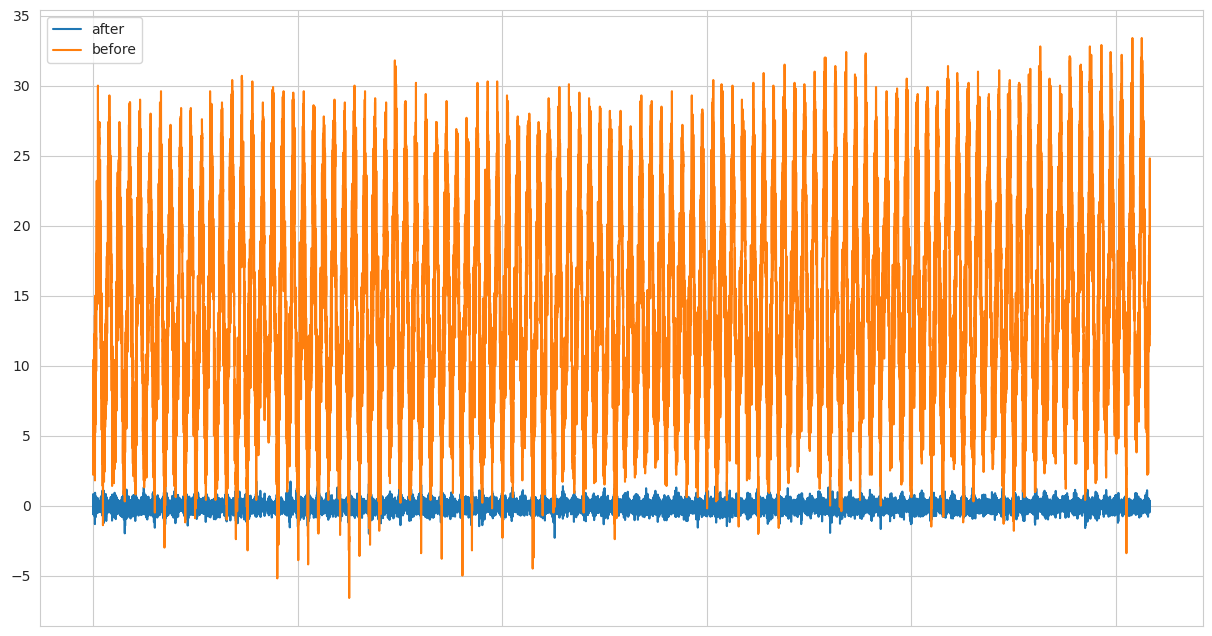

In [129]:
plt.figure(figsize=(15,8))
plt.plot(madrid_temp_squared_diff,label="after")
plt.plot(madrid_temp['temperature'],label="before")
plt.tick_params(
    axis='x',        
    which='both',   
    bottom=False,      
    top=False,        
    labelbottom=False)
plt.legend()
plt.show() 



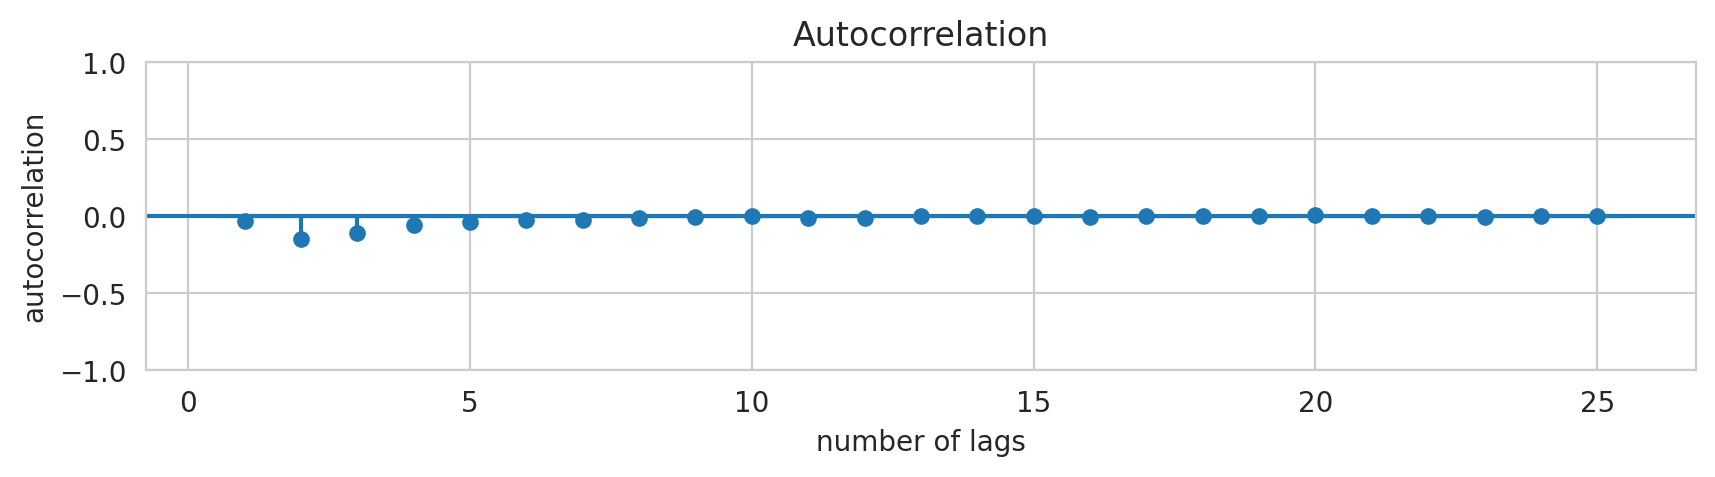

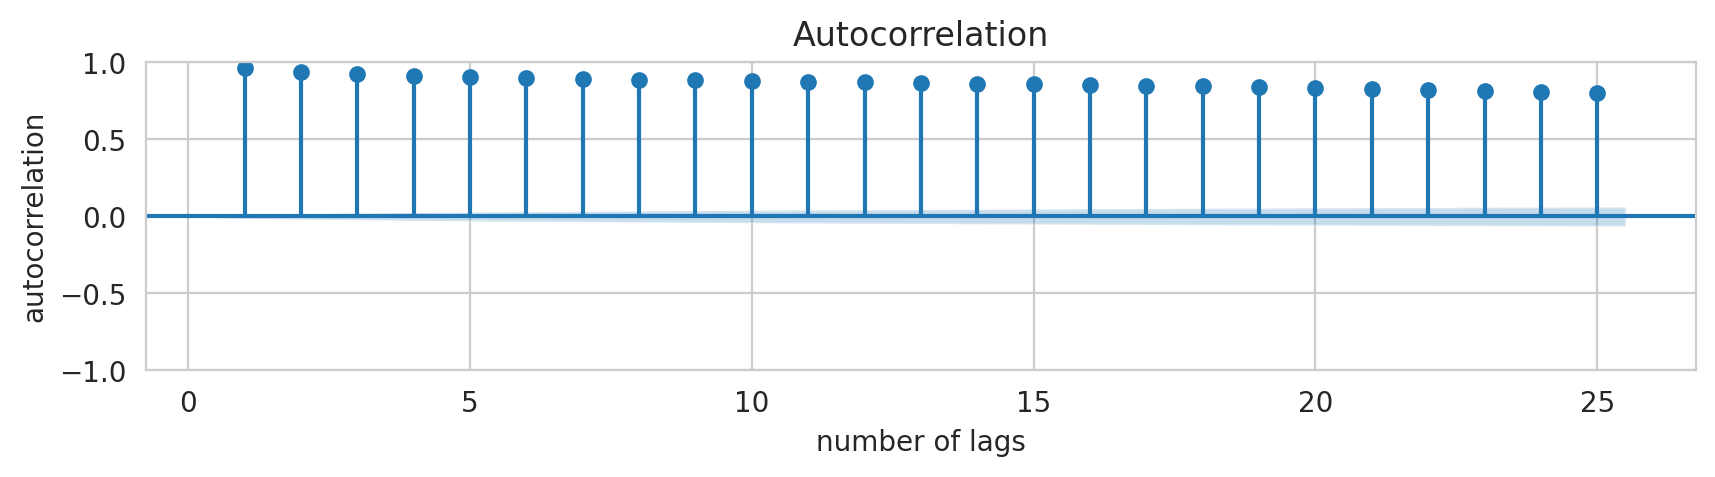

In [130]:
auto_correlation_plot(madrid_temp_squared_diff)
auto_correlation_plot(madrid_temp_combined['predictions_model'])

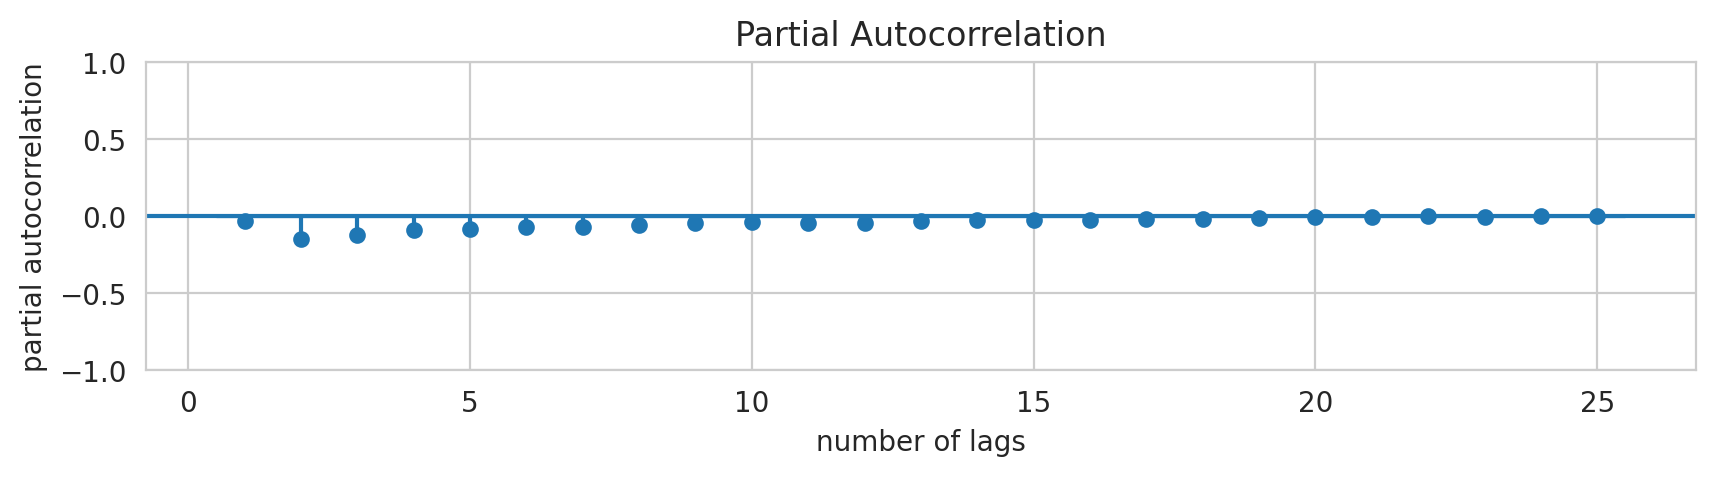

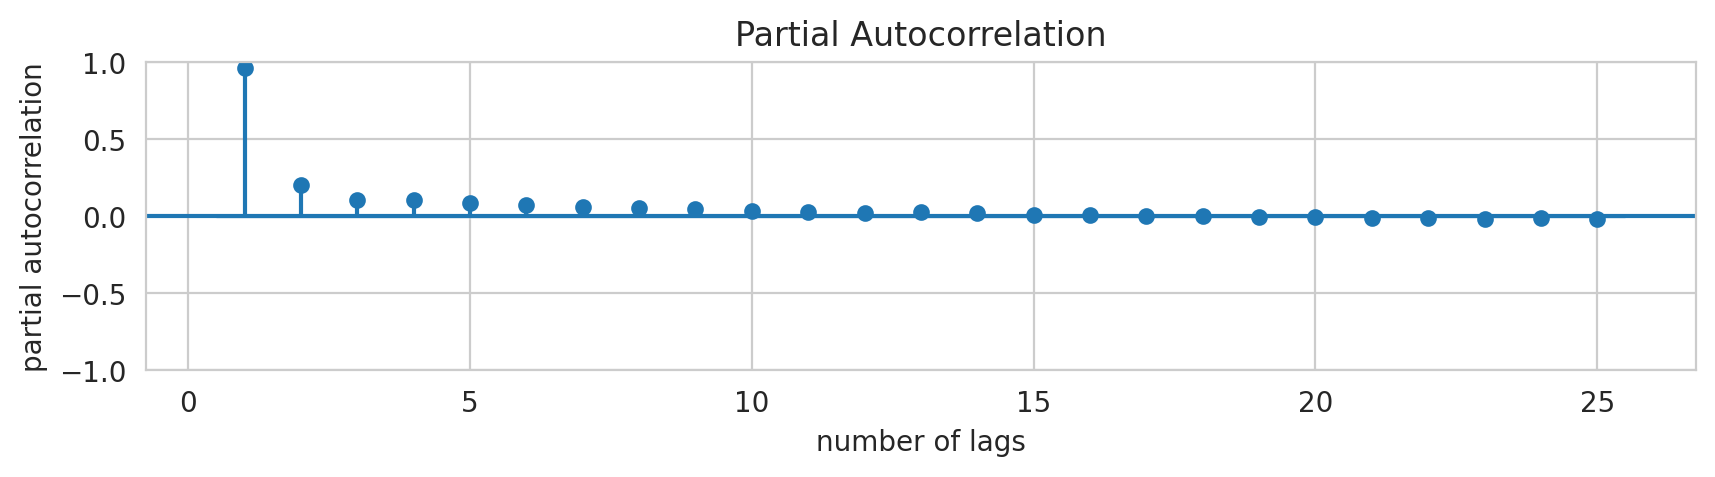

In [131]:
partial_auto_correlation_plot(madrid_temp_squared_diff)
partial_auto_correlation_plot(madrid_temp_combined['predictions_model'])

In [134]:
ar_model_y_p2 = pm.auto_arima(
    madrid_temp_squared_diff, 
    start_p=0,
    max_p=2,
    seasonality = True,
    stationarity = True,
    trace = True,
    n_jobs=-1
)

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=13970.841, Time=4.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15198.871, Time=3.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15172.505, Time=8.00 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15160.321, Time=5.32 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15196.873, Time=1.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12537.817, Time=18.54 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14243.570, Time=13.81 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12525.915, Time=29.45 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12523.914, Time=25.97 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=14367.966, Time=2.44 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=12521.937, Time=3.99 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=13021.062, Time=3.65 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=14365.970, Time=0.88 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=12523.938, Time=5.78 sec
 ARIMA(1,0,0)(0

In [ ]:
ar_model_y_p2.summary()

In [135]:
ar_model_y_p3 = pm.auto_arima(
    madrid_temp_squared_diff, 
    start_p=0,
    max_p=3,
    seasonality = True,
    stationarity = True,
    trace = True,
    n_jobs=-1
)

Performing stepwise search to minimize aic
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=13970.841, Time=4.84 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=15198.871, Time=3.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=15172.505, Time=8.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=15160.321, Time=5.35 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15196.873, Time=1.26 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=12537.817, Time=18.65 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=14243.570, Time=13.91 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=12525.915, Time=29.61 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=12523.914, Time=26.16 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=14367.966, Time=2.42 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=12525.915, Time=15.99 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=13835.340, Time=3.12 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=12527.892, Time=13.86 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=12521.937, Time=4.02 sec
 ARIMA(1,0,1)

In [140]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(madrid_temp_squared_diff, order=(2,0,1))
model = arima_model.fit()

In [142]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:            temperature   No. Observations:                37356
Model:                 ARIMA(2, 0, 1)   Log Likelihood               -6256.957
Date:                Wed, 09 Aug 2023   AIC                          12523.914
Time:                        15:55:49   BIC                          12566.555
Sample:                             0   HQIC                         12537.455
                              - 37356                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.465e-05      0.001      0.139      0.889      -0.001       0.001
ar.L1          0.7692      0.006    125.581      0.000       0.757       0.781
ar.L2         -0.1241      0.004    -27.789      0.0

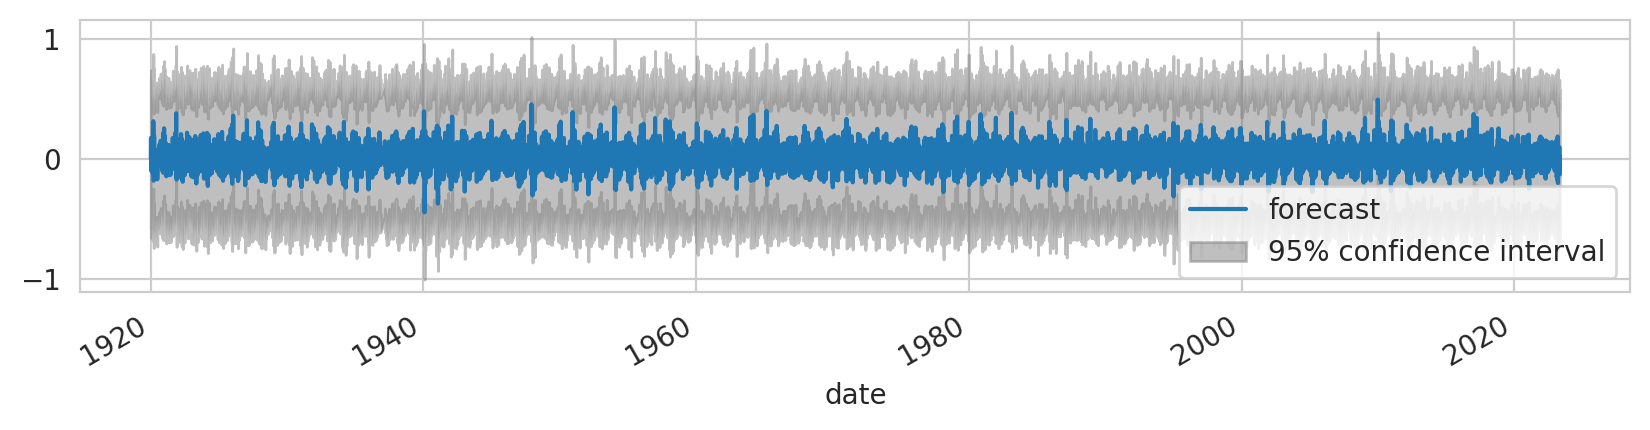

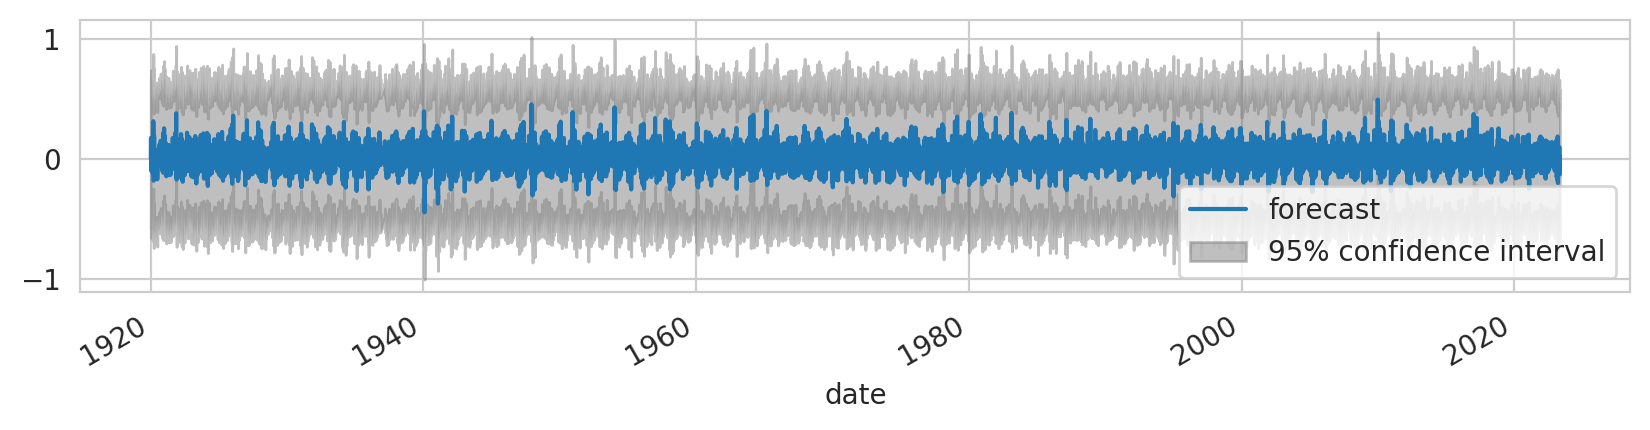

In [150]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model)

In [20]:
ar_model_y_p3 = pm.auto_arima(
    madrid_temp['temperature'], 
    start_p=0,
    max_p=3,
    seasonality = False,
    stationarity = True,
    trace = True,
    n_jobs=-1
)

Performing stepwise search to minimize aic
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=153767.082, Time=3.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=154992.392, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=154941.723, Time=1.20 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=154917.733, Time=1.87 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=154990.393, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=152173.670, Time=9.29 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=153285.634, Time=6.35 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=152150.725, Time=15.22 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=152156.524, Time=7.32 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=152160.179, Time=9.53 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=152034.581, Time=43.99 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=152152.371, Time=11.33 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=152154.007, Time=15.22 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=152155.749, Time=12.75 sec


In [21]:
ar_model = ARIMA(madrid_temp['temperature'], order=(2,1,3))
model_ar= ar_model.fit()

In [47]:
df = model_ar.forecast(365)
df = pd.DataFrame(df)

In [59]:
df.rename(columns={'predicted_mean':'temperature'}, inplace=True)
df

,temperature
37594,19.160921
37595,19.312767
37596,19.453194
37597,19.584539
37598,19.708487
...,...
37689,23.172588
37690,23.179306
37691,23.185820
37692,23.192137


In [62]:
df.set_index(pd.date_range(start='2023-05-01', periods=100), inplace=True)

In [81]:
madrid_temp_df = pd.DataFrame(madrid_temp['temperature'])

In [86]:
madrid_temp_df

,temperature
date,
1920-01-01,10.4
1920-01-02,6.8
1920-01-03,5.5
1920-01-04,4.6
1920-01-05,4.1
...,...
2023-04-26,21.2
2023-04-27,23.2
2023-04-28,24.8


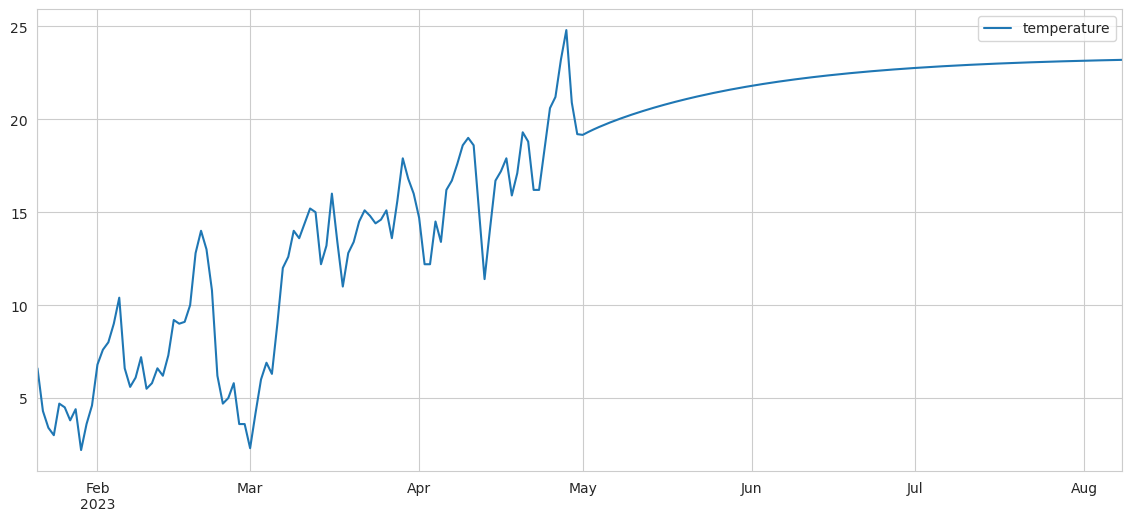

In [88]:
pd.concat([madrid_temp_df[-100:], df]).plot();
plt.legend();

In [53]:
madrid_temp['temperature'].index

In [52]:
madrid_temp['temperature'].loc['2022-05-01':'2022-08-01'].plot();

In [92]:
ar_model_2020 = ARIMA(madrid_temp['temperature'].loc['2020-01-01':], order=(2,1,3))
model_ar_2020 = ar_model_2020.fit()

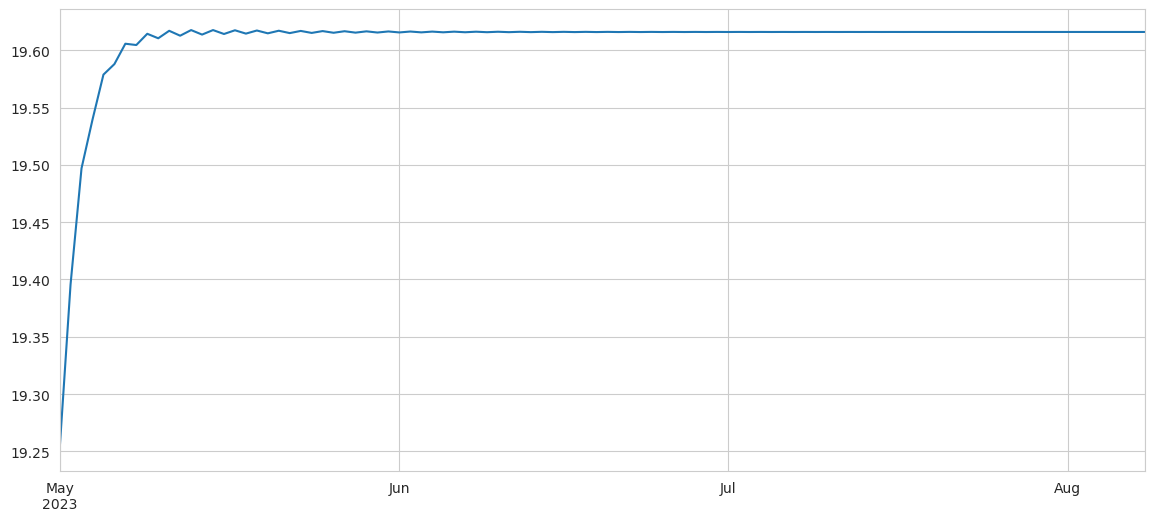

In [94]:
model_ar_2020.forecast(100).plot();

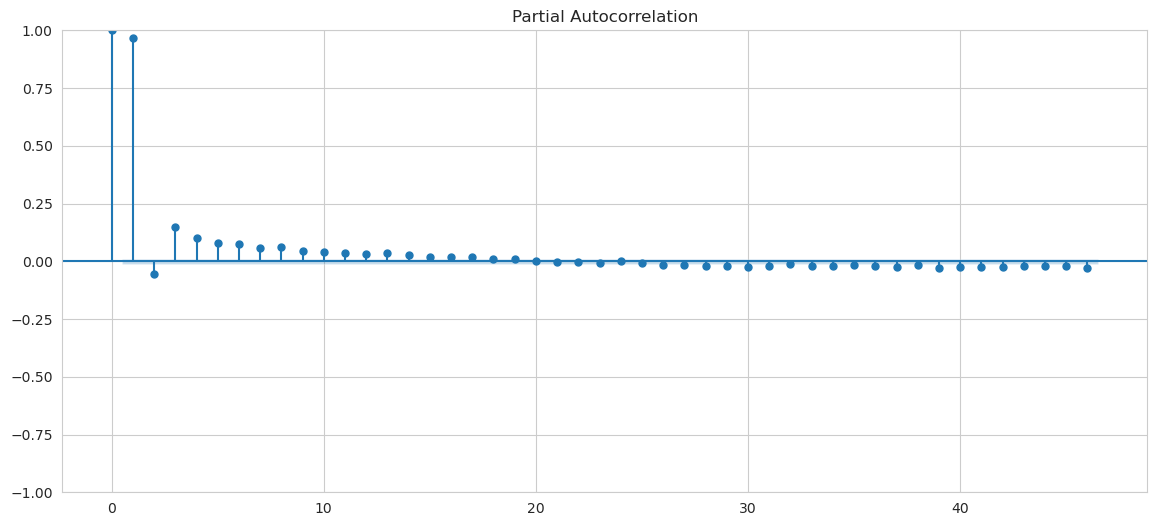

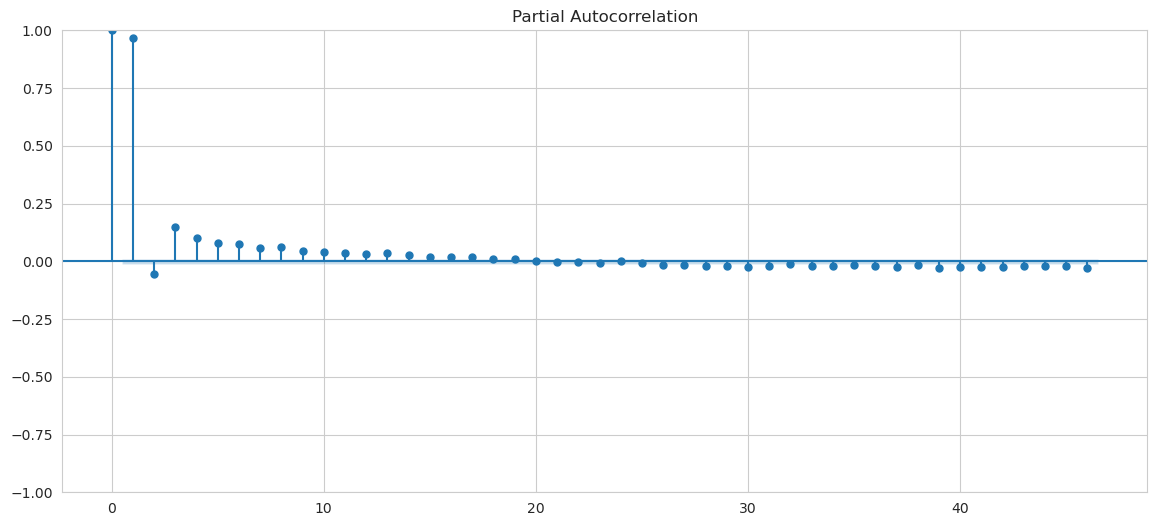

In [56]:
plot_pacf(madrid_temp['temperature'])

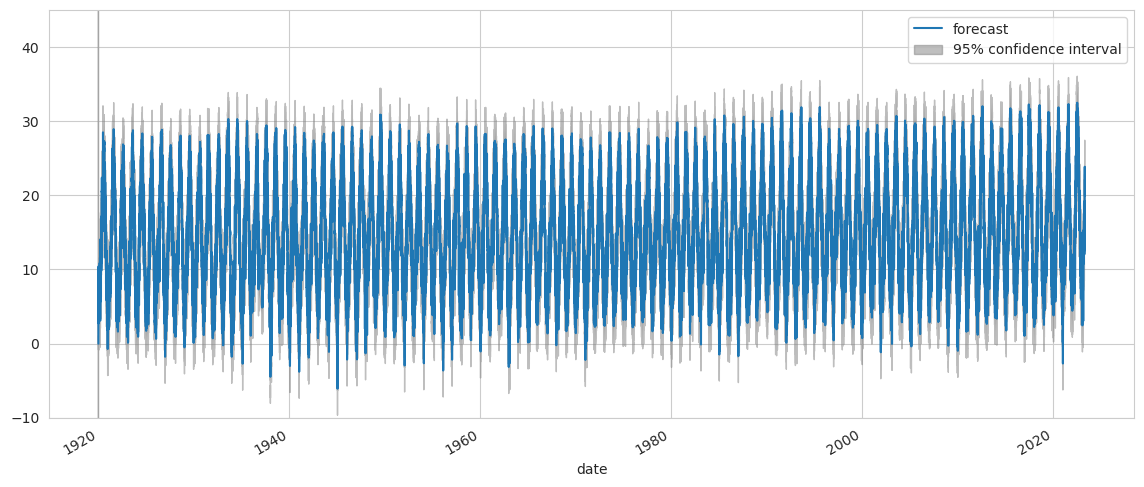

In [71]:
plot_predict(model_before, dynamic=False)
plt.ylim(-10,45);
plt.legend(bbox_to_anchor=(1,1));

In [72]:
madrid_temp['timestep']

date
1920-01-01        0
1920-01-02        1
1920-01-03        2
1920-01-04        3
1920-01-05        4
              ...  
2023-04-26    37589
2023-04-27    37590
2023-04-28    37591
2023-04-29    37592
2023-04-30    37593
Name: timestep, Length: 37594, dtype: int64

In [73]:
model_before.forecast(2)

37594    19.160921
37595    19.312767
Name: predicted_mean, dtype: float64

In [74]:
y_pred_arima = pd.Series(model_before.forecast(30))
y_true_arima = madrid_temp['temperature'][-2:]

print(np.array(y_pred_arima))
print(np.array(y_true_arima))

[19.16092058 19.31276726 19.45319385 19.58453886 19.70848711 19.82626004
 19.93875037 20.04661742 20.15035451 20.25033677 20.34685486 20.44013897
 20.53037572 20.61772021 20.70230453 20.78424383 20.86364059 20.94058771
 21.01517067 21.08746913 21.15755803 21.2255084  21.291388   21.35526167
 21.41719175 21.47723825 21.53545909 21.59191021 21.64664572 21.69971797]
[20.9 19.2]


In [76]:
ma_model_y = pm.auto_arima(
    madrid_temp['temperature'], 
    start_p=0,
    max_p=0,
    start_q=1,
    seasonality = True,
    stationarity = False,
    trace = True,
    n_jobs=-1
)

Performing stepwise search to minimize aic
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=154917.733, Time=1.97 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=154992.392, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=154990.393, Time=0.49 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=153767.082, Time=3.10 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=152759.116, Time=4.12 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=152363.083, Time=5.75 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=152204.088, Time=7.38 sec
 ARIMA(0,1,5)(0,0,0)[0]             : AIC=152202.095, Time=3.18 sec
 ARIMA(0,1,4)(0,0,0)[0]             : AIC=152361.088, Time=2.58 sec

Best model:  ARIMA(0,1,5)(0,0,0)[0]          
Total fit time: 29.194 seconds


In [78]:
q_1_model = ARIMA(madrid_temp['temperature'], order=(0,1,5))
model_q_1 = q_1_model.fit() 

In [84]:
model_q_1.forecast(20)

37594    19.093417
37595    19.255636
37596    19.472640
37597    19.709601
37598    19.746646
37599    19.746646
37600    19.746646
37601    19.746646
37602    19.746646
37603    19.746646
37604    19.746646
37605    19.746646
37606    19.746646
37607    19.746646
37608    19.746646
37609    19.746646
37610    19.746646
37611    19.746646
37612    19.746646
37613    19.746646
Name: predicted_mean, dtype: float64

In [90]:
i_model_y = pm.auto_arima(
    madrid_temp['temperature'], 
    start_p=0,
    max_p=3,
    start_q=0,
    max_q=0,
    seasonality = True,
    stationarity = False,
    trace = True,
    n_jobs=-1
)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=154992.392, Time=0.61 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=154941.723, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=154990.393, Time=0.49 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=153926.567, Time=1.59 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=153455.702, Time=2.00 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=153453.704, Time=1.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=153924.568, Time=0.87 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 7.907 seconds


In [85]:
i_model = ARIMA(madrid_temp['temperature'], order=(3,1,0))
model_i = i_model.fit()

In [89]:
model_i.forecast(20)

37594    19.596352
37595    20.311909
37596    20.457245
37597    20.303174
37598    20.196235
37599    20.201705
37600    20.236021
37601    20.247979
37602    20.242230
37603    20.236352
37604    20.235778
37605    20.237338
37606    20.238125
37607    20.237962
37608    20.237659
37609    20.237589
37610    20.237654
37611    20.237700
37612    20.237699
37613    20.237684
Name: predicted_mean, dtype: float64

In [17]:
arma_model_y = pm.auto_arima(
    madrid_temp['temperature'], 
    seasonality = True,
    stationarity = False,
    trace = True,
    n_jobs=-1
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=152150.725, Time=15.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=154992.392, Time=0.58 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=154941.723, Time=1.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=154917.733, Time=1.89 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=154990.393, Time=0.46 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=152173.670, Time=9.27 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=152156.524, Time=7.39 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=152160.179, Time=9.63 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=152034.581, Time=45.42 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=152152.371, Time=11.91 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=152154.007, Time=15.76 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=152155.749, Time=12.61 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=152153.658, Time=16.25 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=56.94 sec
 ARIM

In [18]:
arima_model_y = pm.auto_arima(
    madrid_temp['temperature'], 
    seasonality = True,
    stationarity = False,
    d=None,
    trace = True,
    n_jobs=-1
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=152150.725, Time=15.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=154992.392, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=154941.723, Time=1.22 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=154917.733, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=154990.393, Time=0.47 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=152173.670, Time=9.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=152156.524, Time=7.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=152160.179, Time=9.83 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=152034.581, Time=44.52 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=152152.371, Time=11.68 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=152154.007, Time=15.67 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=152155.749, Time=14.17 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=152153.658, Time=17.14 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=58.63 sec
 ARIM

In [ ]:
sarima_model_y = pm.auto_arima(
    madrid_temp['temperature'], 
    seasonality = True,
    stationarity = False,
    d=None,
    m=12,
    trace = True,
    n_jobs=-1
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=152153.139, Time=50.49 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=154992.392, Time=0.58 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=154941.856, Time=4.83 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=154917.908, Time=7.58 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=154990.393, Time=0.46 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=152151.586, Time=42.46 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=152150.725, Time=15.39 sec


In [ ]:
sarima_model = ARIMA(madrid_temp['temperature'], order=())
model_sarima = sarima_model.fit()